In [7]:
import xarray as xr
import os
import oscarplus as op
import plot_helpers as ph
from oscarplus.processing.secondary_products import calculate_upwelling_SWT

# Making figures 1, 2 and 4

## Input parameters for plotting

In [8]:
# OSCAR
date = "20220522"
track = "2"
gmf = "mouche12kp20_rsv20"

## Load and process data for single day plots and transects

In [9]:
# load bathymetry
bathymetry_path = op.tools.readers.get_data_dirs()["bathymetry"]
bathymetry = xr.open_mfdataset(
    os.path.join(bathymetry_path, "Iroise_Sea_Bathymetry_EMODnet.nc")
)  # change path to select a different file

# load OSCAR
OSCAR, _ = op.tools.readers.read_OSCAR(date, track, gmf, "L2a MF")
calculate_upwelling_SWT(OSCAR, -bathymetry["elevation"])  # add currentW to L2a_MF
OSCAR = op.tools.utils.cut_NaNs(OSCAR)

In [10]:
# Take transects
current_transect, elevation_transect = op.tools.utils.transect(
    OSCAR,
    bathymetry,
    iGround=10,
    jCross=24,
    angle=0,
)

## Make figures

Max velocity: 2.1882490618829067
Divergence range: -15.963307918895897,14.498740781759452
Vertical velocity range: -0.13158351845057725,0.12187175987324135


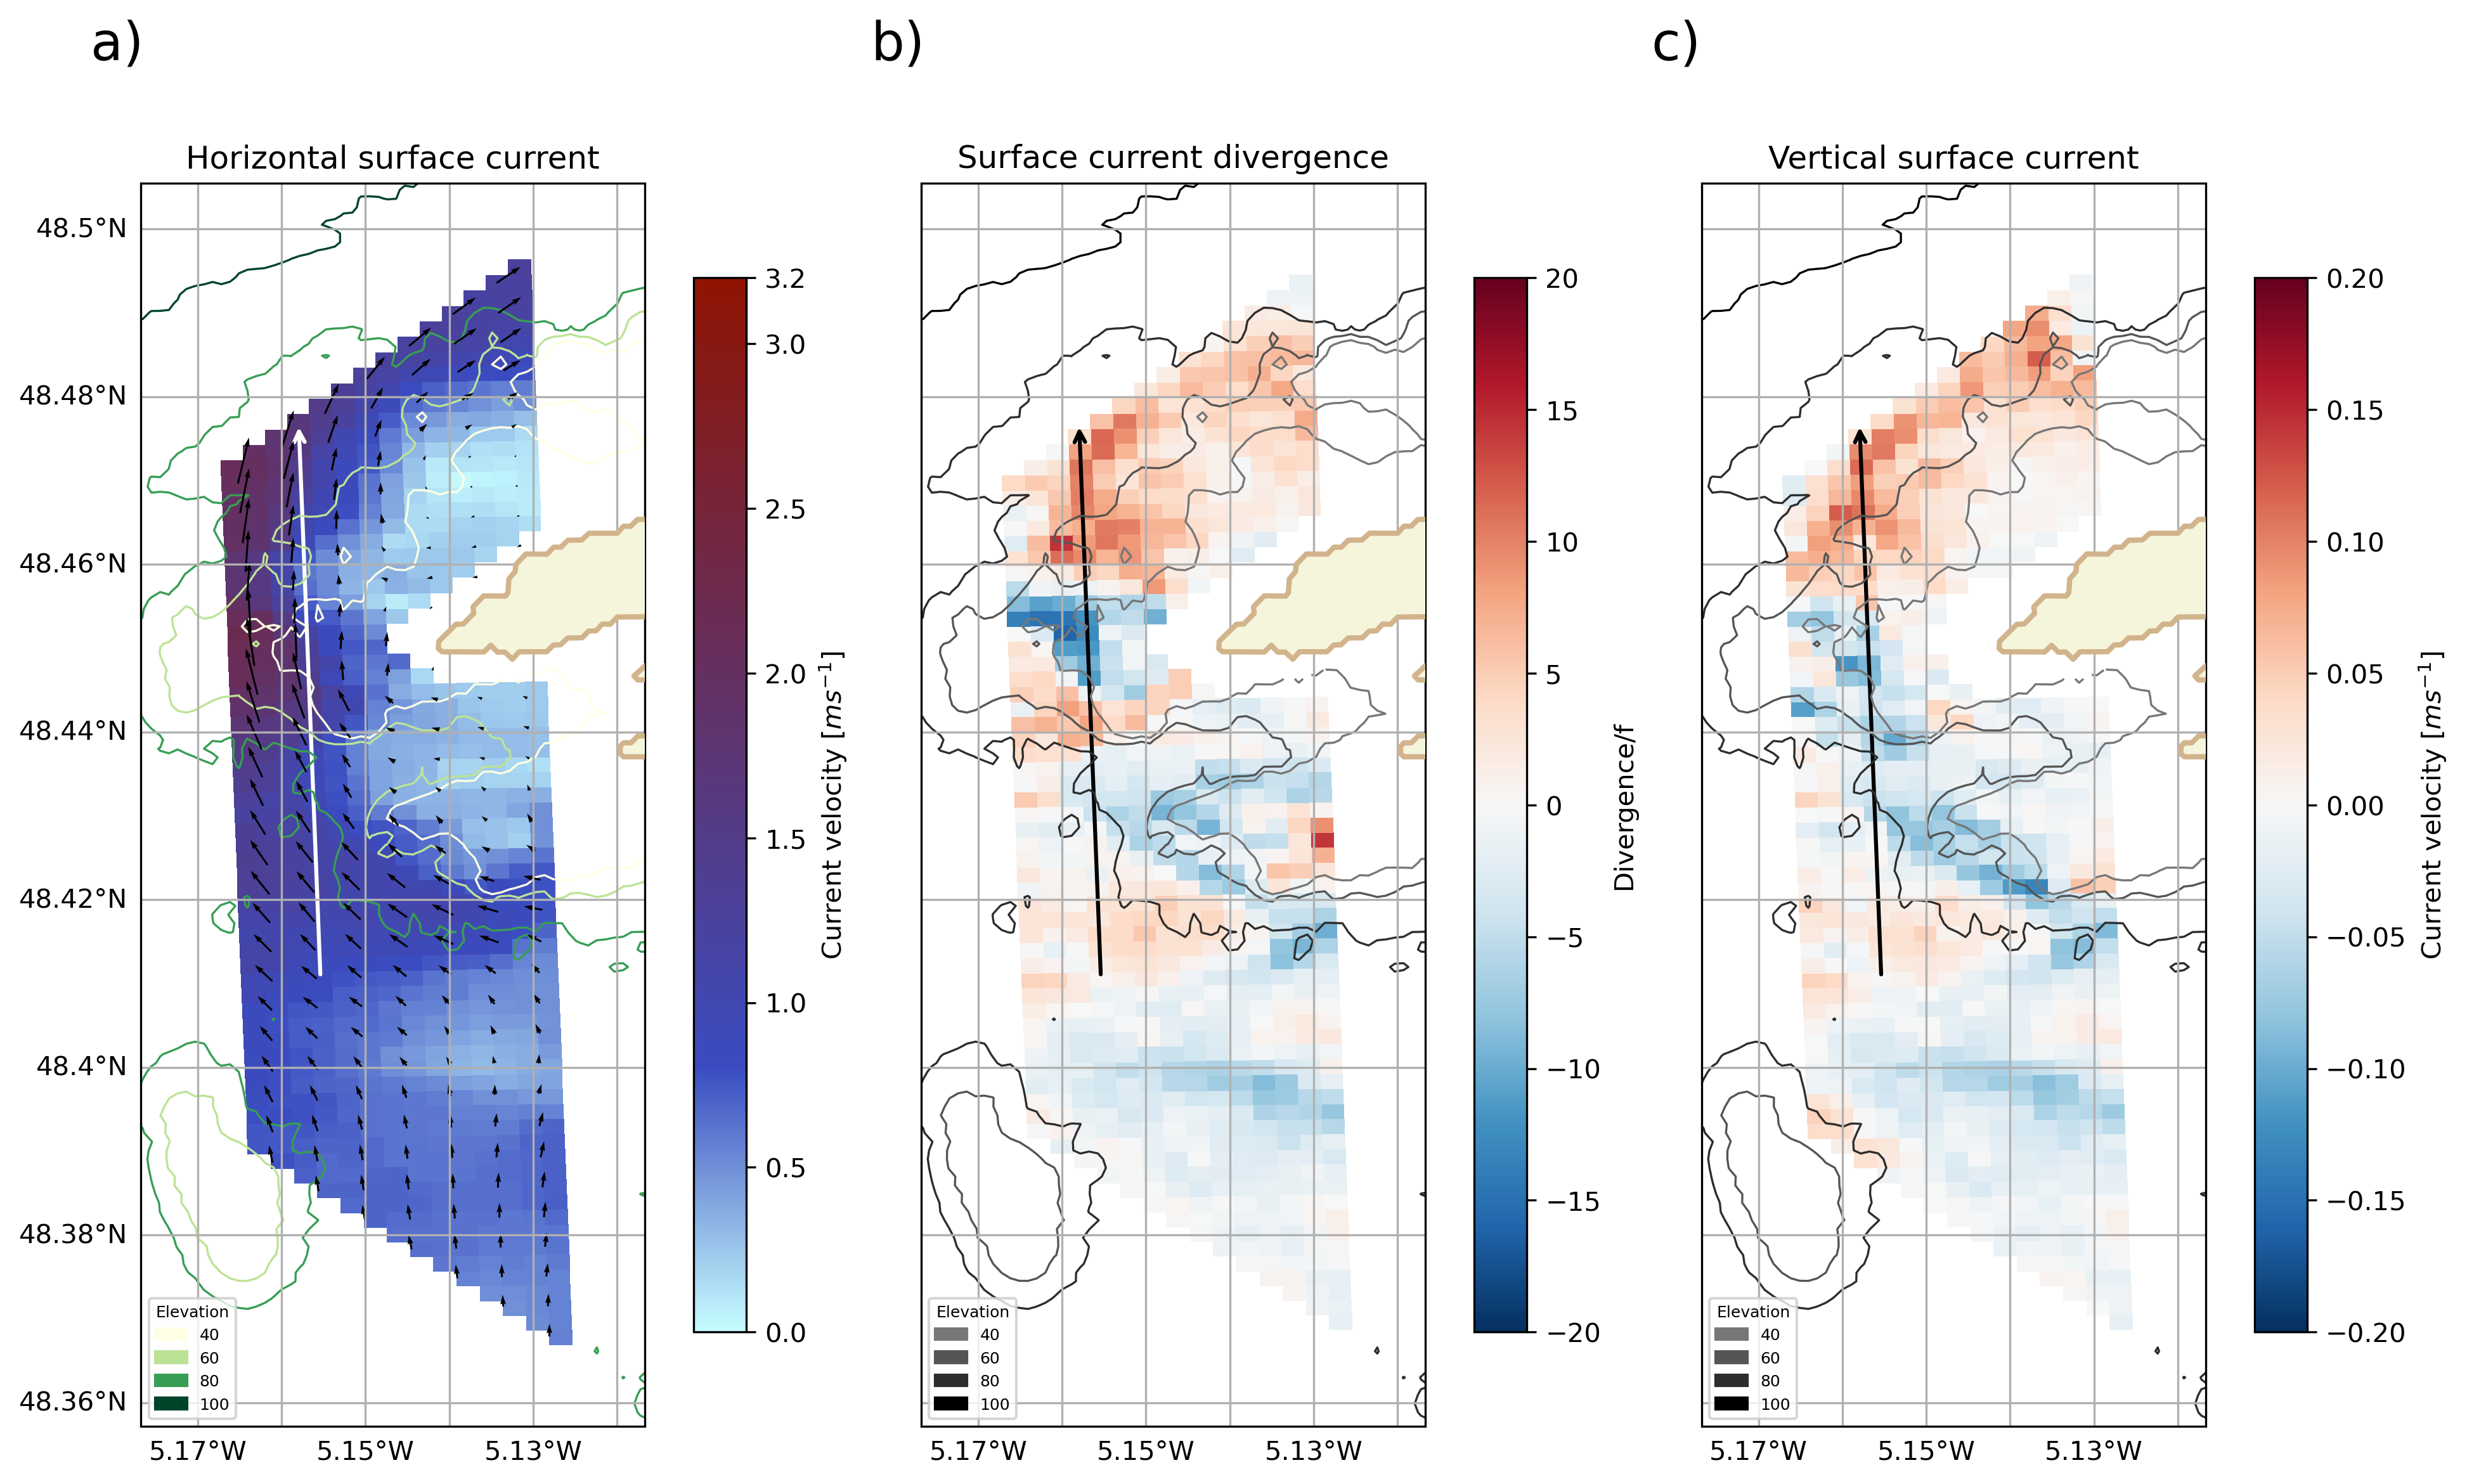

In [11]:
# plot figure 1
axes = ph.plot_all_three_on_one(
    DS=OSCAR,
    bathymetry=bathymetry,
    figsize=(15, 9),
    legend_location="lower left",
    xoffset=-0.01,
    yoffset=-0.01,
)

# find the coordinates of the transects
coordinates = ph.extract_transect_range(current_transect)

# add arrows
ph.add_arrow(axes[0], **coordinates, color="white", linewidth=1.5)
for ax in axes[1:]:
    ph.add_arrow(ax, **coordinates, color="black", linewidth=1.5)

ph.print_ranges(OSCAR)

Text(0.5, 1.0, 'Transect: divergence and vertical current')

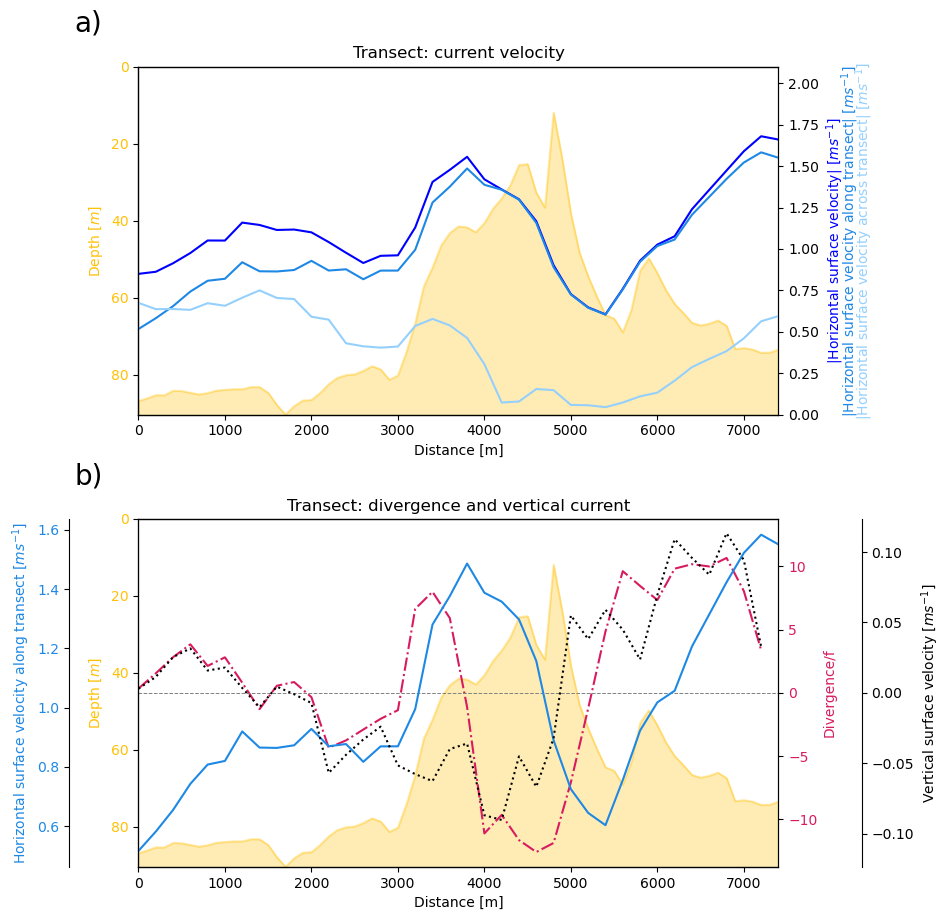

In [12]:
# plot figure 2
current_transects = [current_transect]
elevation_transects = [elevation_transect]
transect_axes = ph.plot_transects(
    current_transects, elevation_transects, figsize=(8, 10)
)
transect_axes[0].set_title("Transect: current velocity")
transect_axes[1].set_title("Transect: divergence and vertical current")